In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
df_admission = pd.read_csv("admission.csv")

In [3]:
df_admission

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [4]:
df_admission.dtypes


Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [5]:
df_admission.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
df_admission = df_admission.drop(["Serial No."],axis=1)

In [7]:
df_admission.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


In [8]:
df_admission.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
df_admission.shape

(500, 8)

In [10]:
df_admission.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


### Exploratory Data Analysis (EDA) 

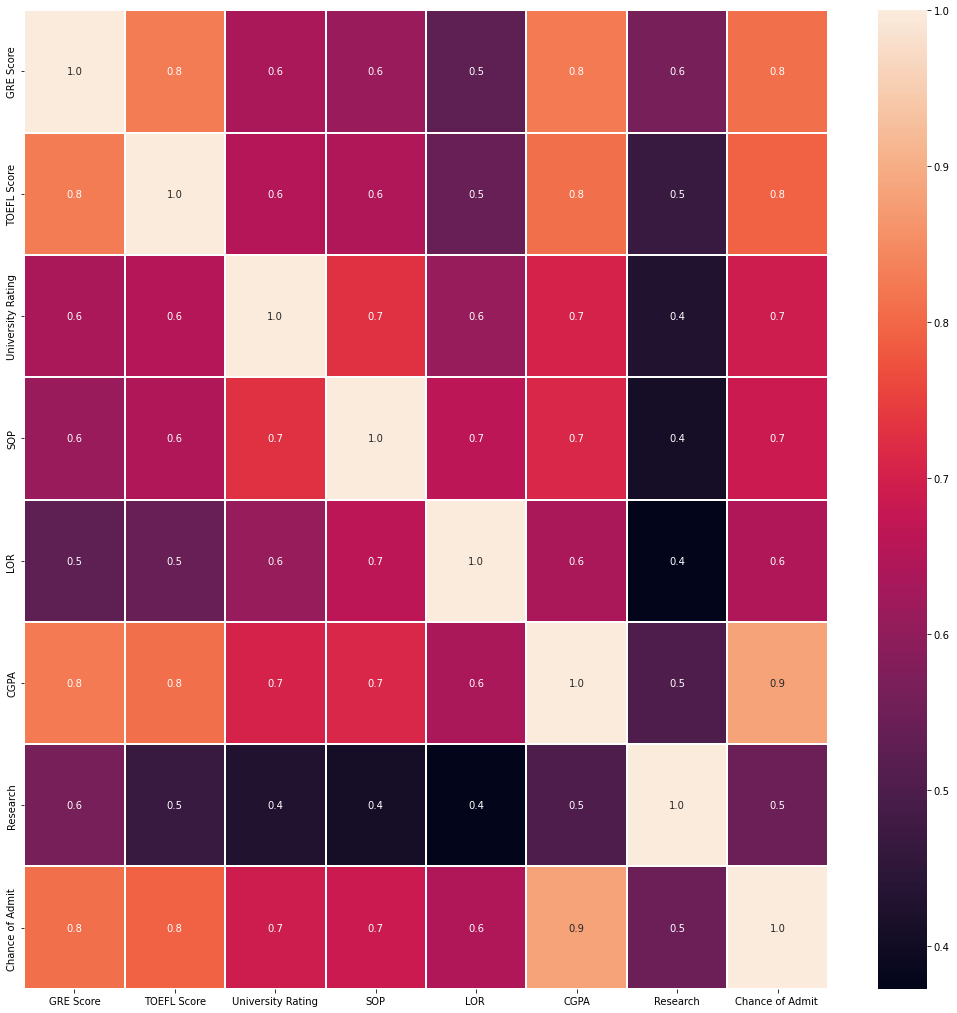

In [11]:
f,ax = plt.subplots(figsize = (18,18))

ax = sns.heatmap( df_admission.corr(),linewidths=0.10,annot=True,fmt=".1f",ax=ax)


plt.show()

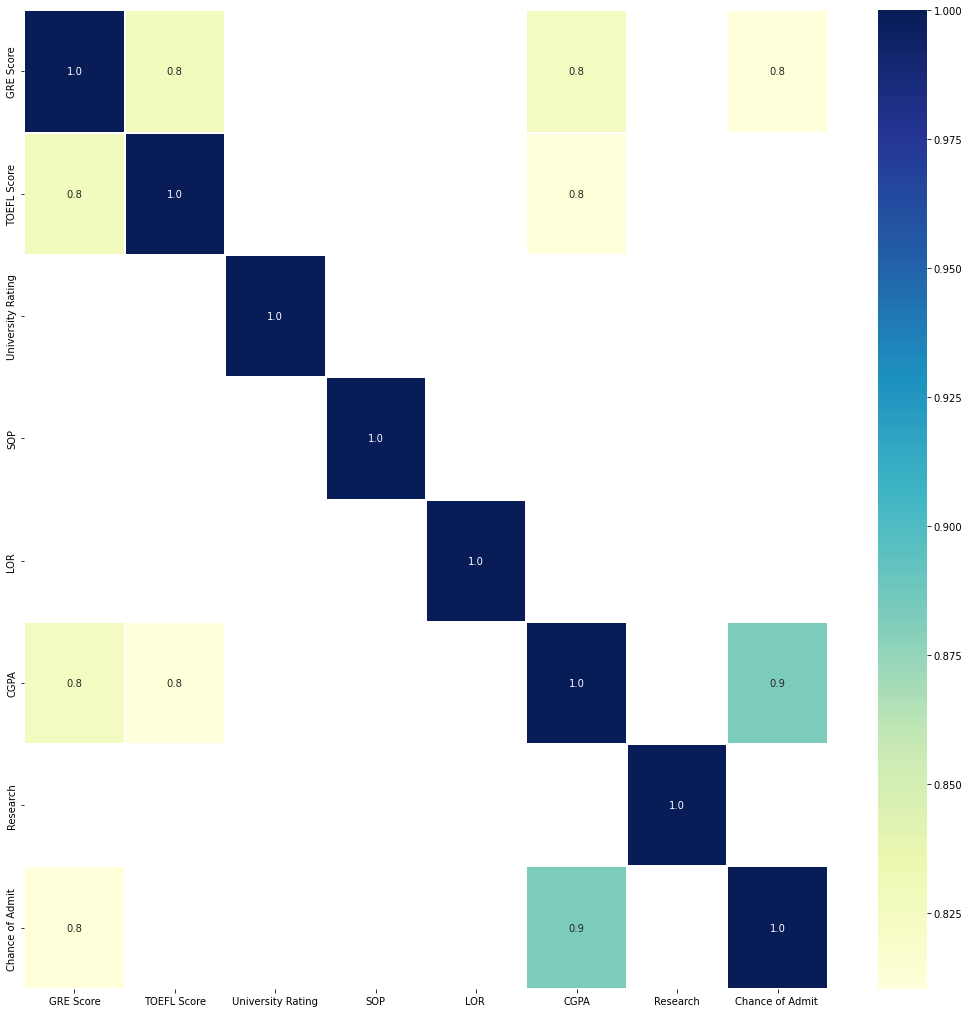

In [12]:
plt.figure(figsize = (18,18))

ax = sns.heatmap( df_admission.corr(),cmap='YlGnBu',linewidths=0.30,annot=True,fmt=".1f",mask = (np.abs(df_admission.corr()) <= 0.8) )


plt.show()

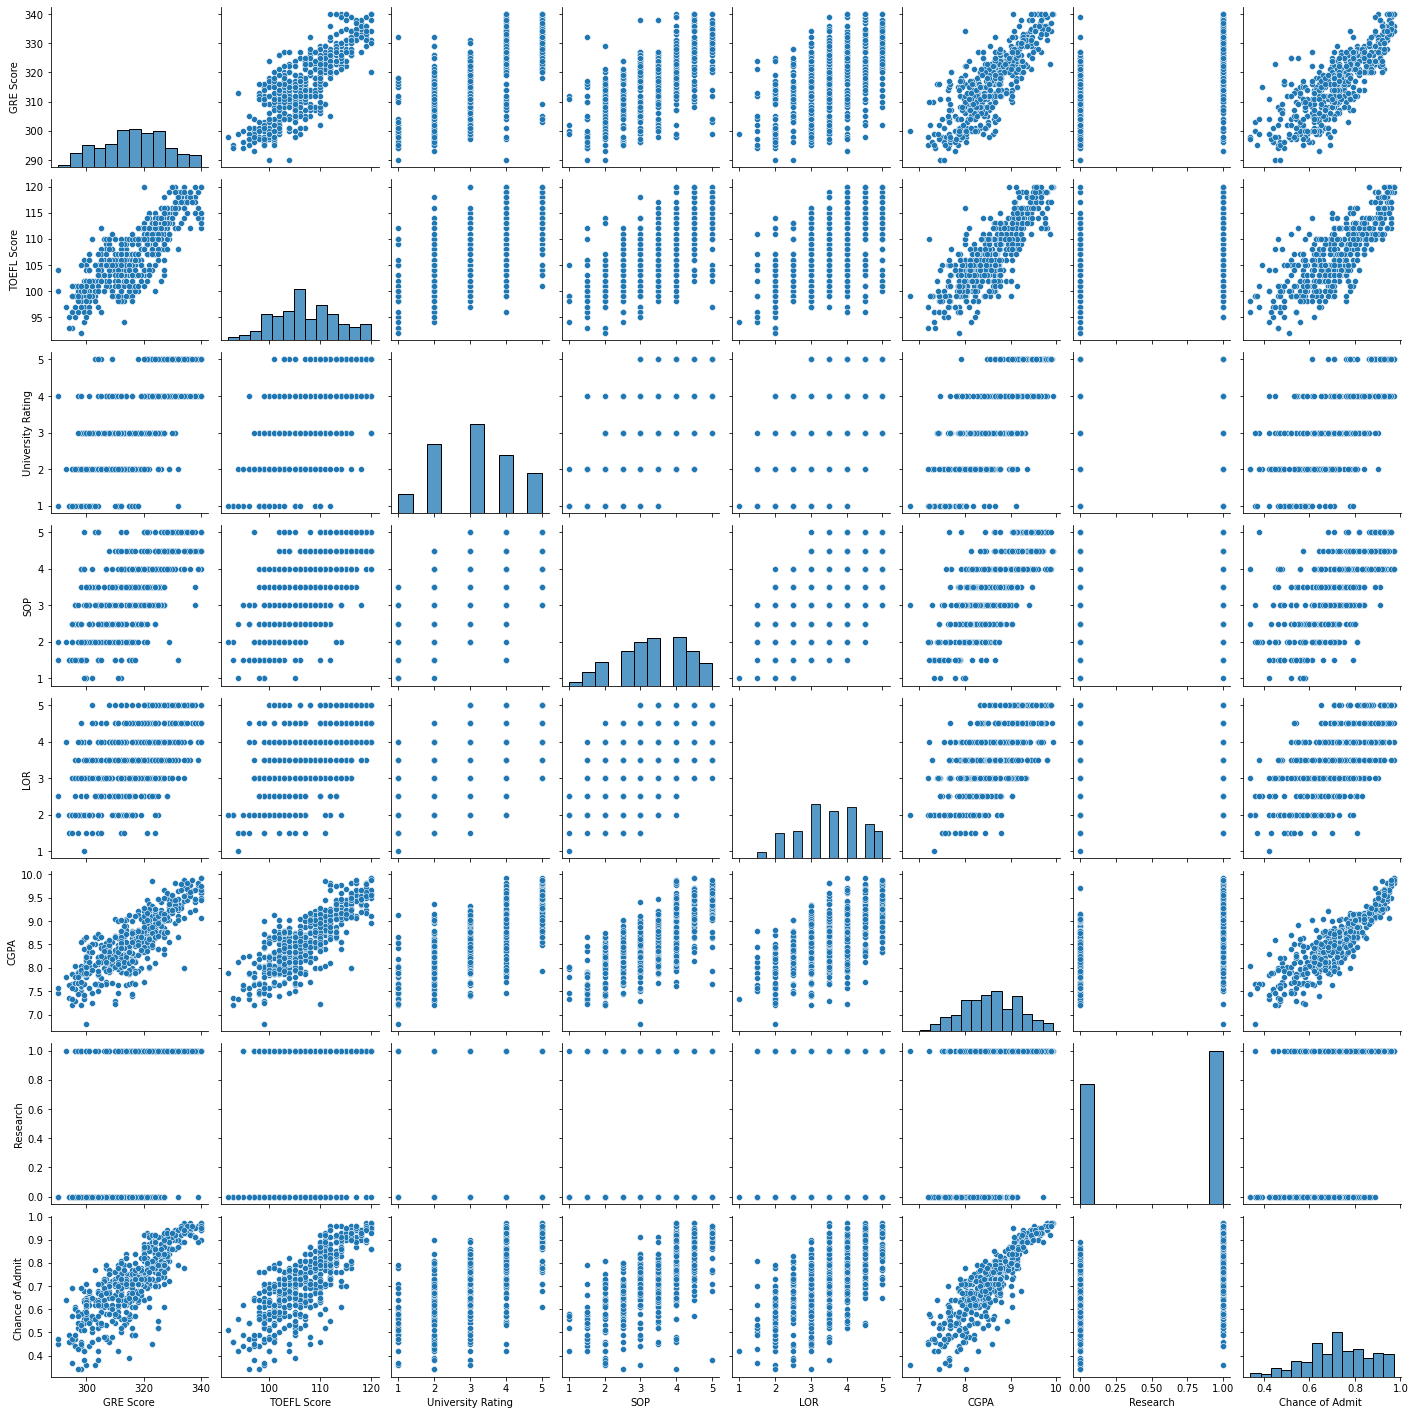

In [13]:
sns.pairplot(df_admission)
plt.show()

In [14]:
print("Maximum values of GRE score : ",df_admission["GRE Score"].max())
print("Minimum values of GRE score :",df_admission["GRE Score"].min())

Maximum values of GRE score :  340
Minimum values of GRE score : 290


In [15]:
df = pd.DataFrame(df_admission,columns=['University Rating'])
df['percent']=(df['University Rating']/df['University Rating'].sum())*100
df

,University Rating,percent
0,4,0.256904
1,4,0.256904
2,3,0.192678
3,3,0.192678
4,2,0.128452
...,...,...
495,5,0.321130
496,5,0.321130
497,5,0.321130
498,4,0.256904


In [16]:
df_admission['Chance of Admit '] = np.where(df_admission['Chance of Admit '] >= 0.80, 1, 0)

In [17]:
df_admission

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,0
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,1
496,337,117,5,5.0,5.0,9.87,1,1
497,330,120,5,4.5,5.0,9.56,1,1
498,312,103,4,4.0,5.0,8.43,0,0


<!-- Build a Decision Tree classifier, to predict whether a
student has a low or high chance of admission to a chosen
university. Perform Hyperparameter Tuning to improve
the accuracy of the model. -->

In [18]:
X = df_admission.iloc[:,:-1]
y = df_admission.iloc[:,-1]

In [19]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=10)

In [21]:
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (400, 7)
X_test (100, 7)
y_train (400,)
y_test (100,)


# Decision Tree

In [22]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

In [23]:
decision_tree_model = decision_tree.fit(X_train,y_train)

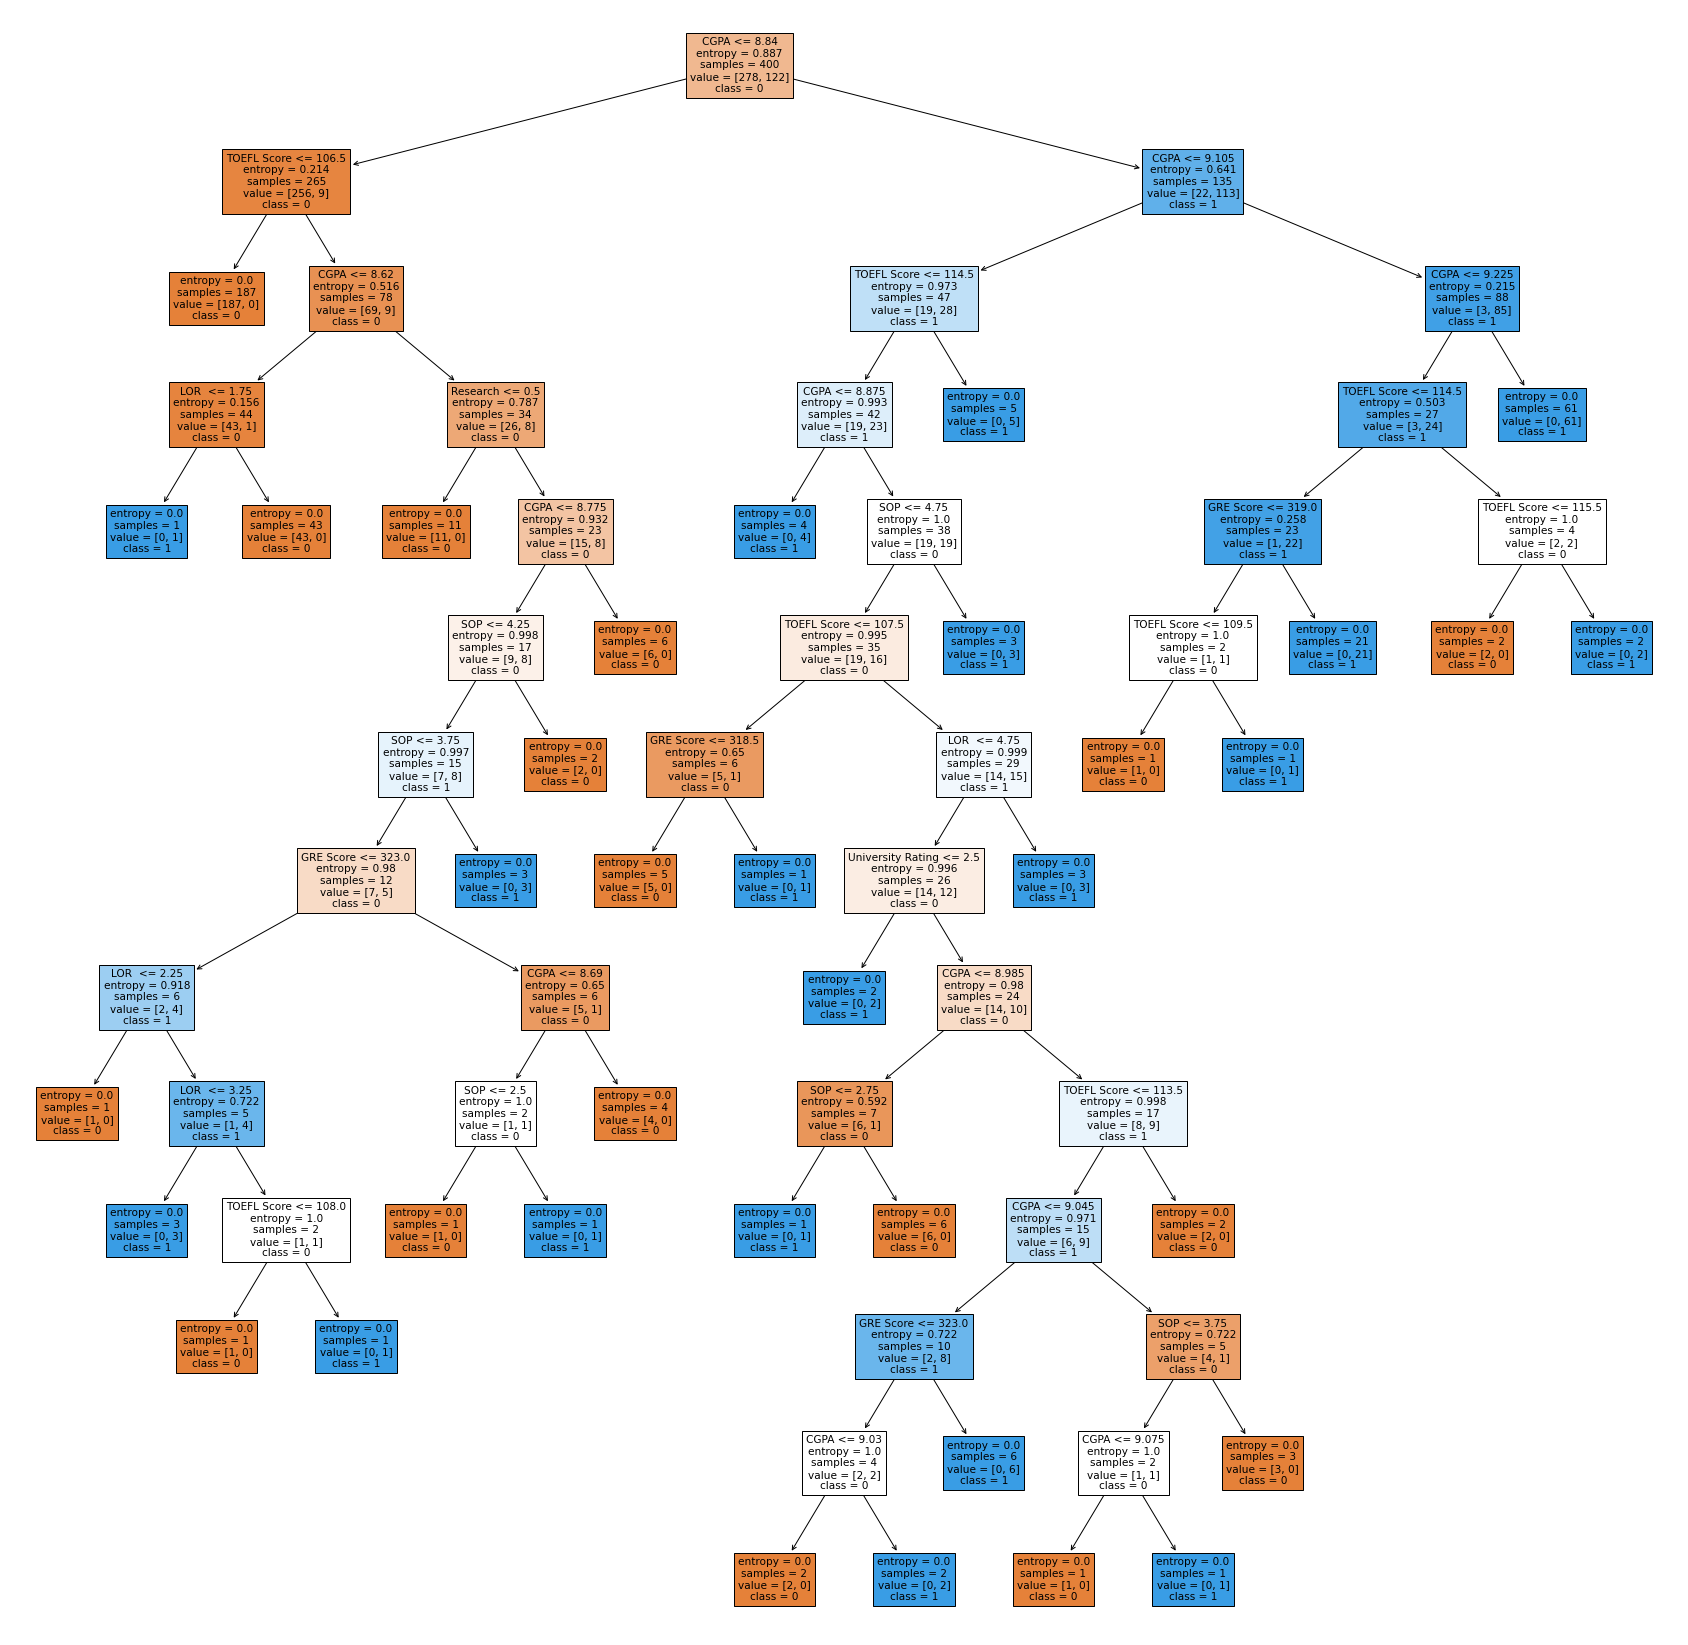

In [24]:
labels=X_train.columns
fig = plt.figure(figsize=(30,30))

d = tree.plot_tree(decision_tree_model,feature_names=labels,class_names=["0","1"],filled=True)

In [25]:
y_predict = decision_tree_model.predict(X_test)

In [26]:
matrix = confusion_matrix(y_test,y_predict)
matrix

array([[64,  3],
       [ 5, 28]], dtype=int64)

In [27]:
test_report = classification_report(y_test,y_predict)
print(test_report)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        67
           1       0.90      0.85      0.88        33

    accuracy                           0.92       100
   macro avg       0.92      0.90      0.91       100
weighted avg       0.92      0.92      0.92       100



In [28]:
kappa_score = cohen_kappa_score(y_test,y_predict)
kappa_score

0.816260909508498

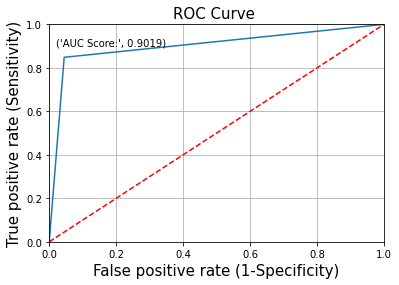

In [29]:
fpr , tpr, thresholds = roc_curve(y_test, y_predict)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC Curve ', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_predict),4)))

plt.grid(True)

In [30]:
from  sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
print("precision_score : ",precision_score(y_test, y_predict))

print("recall_score    : ",recall_score(y_test, y_predict))

print("f1_score        : ",f1_score(y_test, y_predict))

print("accuracy_score  : ",accuracy_score(y_test, y_predict))

precision_score :  0.9032258064516129
recall_score    :  0.8484848484848485
f1_score        :  0.875
accuracy_score  :  0.92


# Decision Tree (using GridSearchCV)

In [31]:
tunede_parameter = [{'criterion': ['gini', 'entropy'],
                     'min_samples_split': [10,15,20,25, 30],
                     'max_depth': [3, 5, 7, 9,11,13],
                     'min_samples_leaf': [5,10,15, 20, 25, 30, 35],
                     'max_leaf_nodes': [5, 10, 15, 20, 25,30]}]

In [32]:
decision_tree_clasification = DecisionTreeClassifier(random_state=10)

grid = GridSearchCV(estimator=decision_tree_clasification,param_grid=tunede_parameter,cv=10)

df_grid = grid.fit(X_train,y_train)

print(df_grid.best_params_)


{'criterion': 'entropy', 'max_depth': 3, 'max_leaf_nodes': 5, 'min_samples_leaf': 5, 'min_samples_split': 10}


In [33]:
df_grid_model = DecisionTreeClassifier(criterion=df_grid.best_params_.get("criterion"),
                                       max_depth = df_grid.best_params_.get('max_depth'),
                                       max_leaf_nodes = df_grid.best_params_.get('max_leaf_nodes'),
                                       min_samples_leaf = df_grid.best_params_.get('min_samples_leaf'),
                                       min_samples_split = df_grid.best_params_.get('min_samples_split'),
                                       random_state = 10)
df_grid_model = df_grid_model.fit(X_train,y_train)

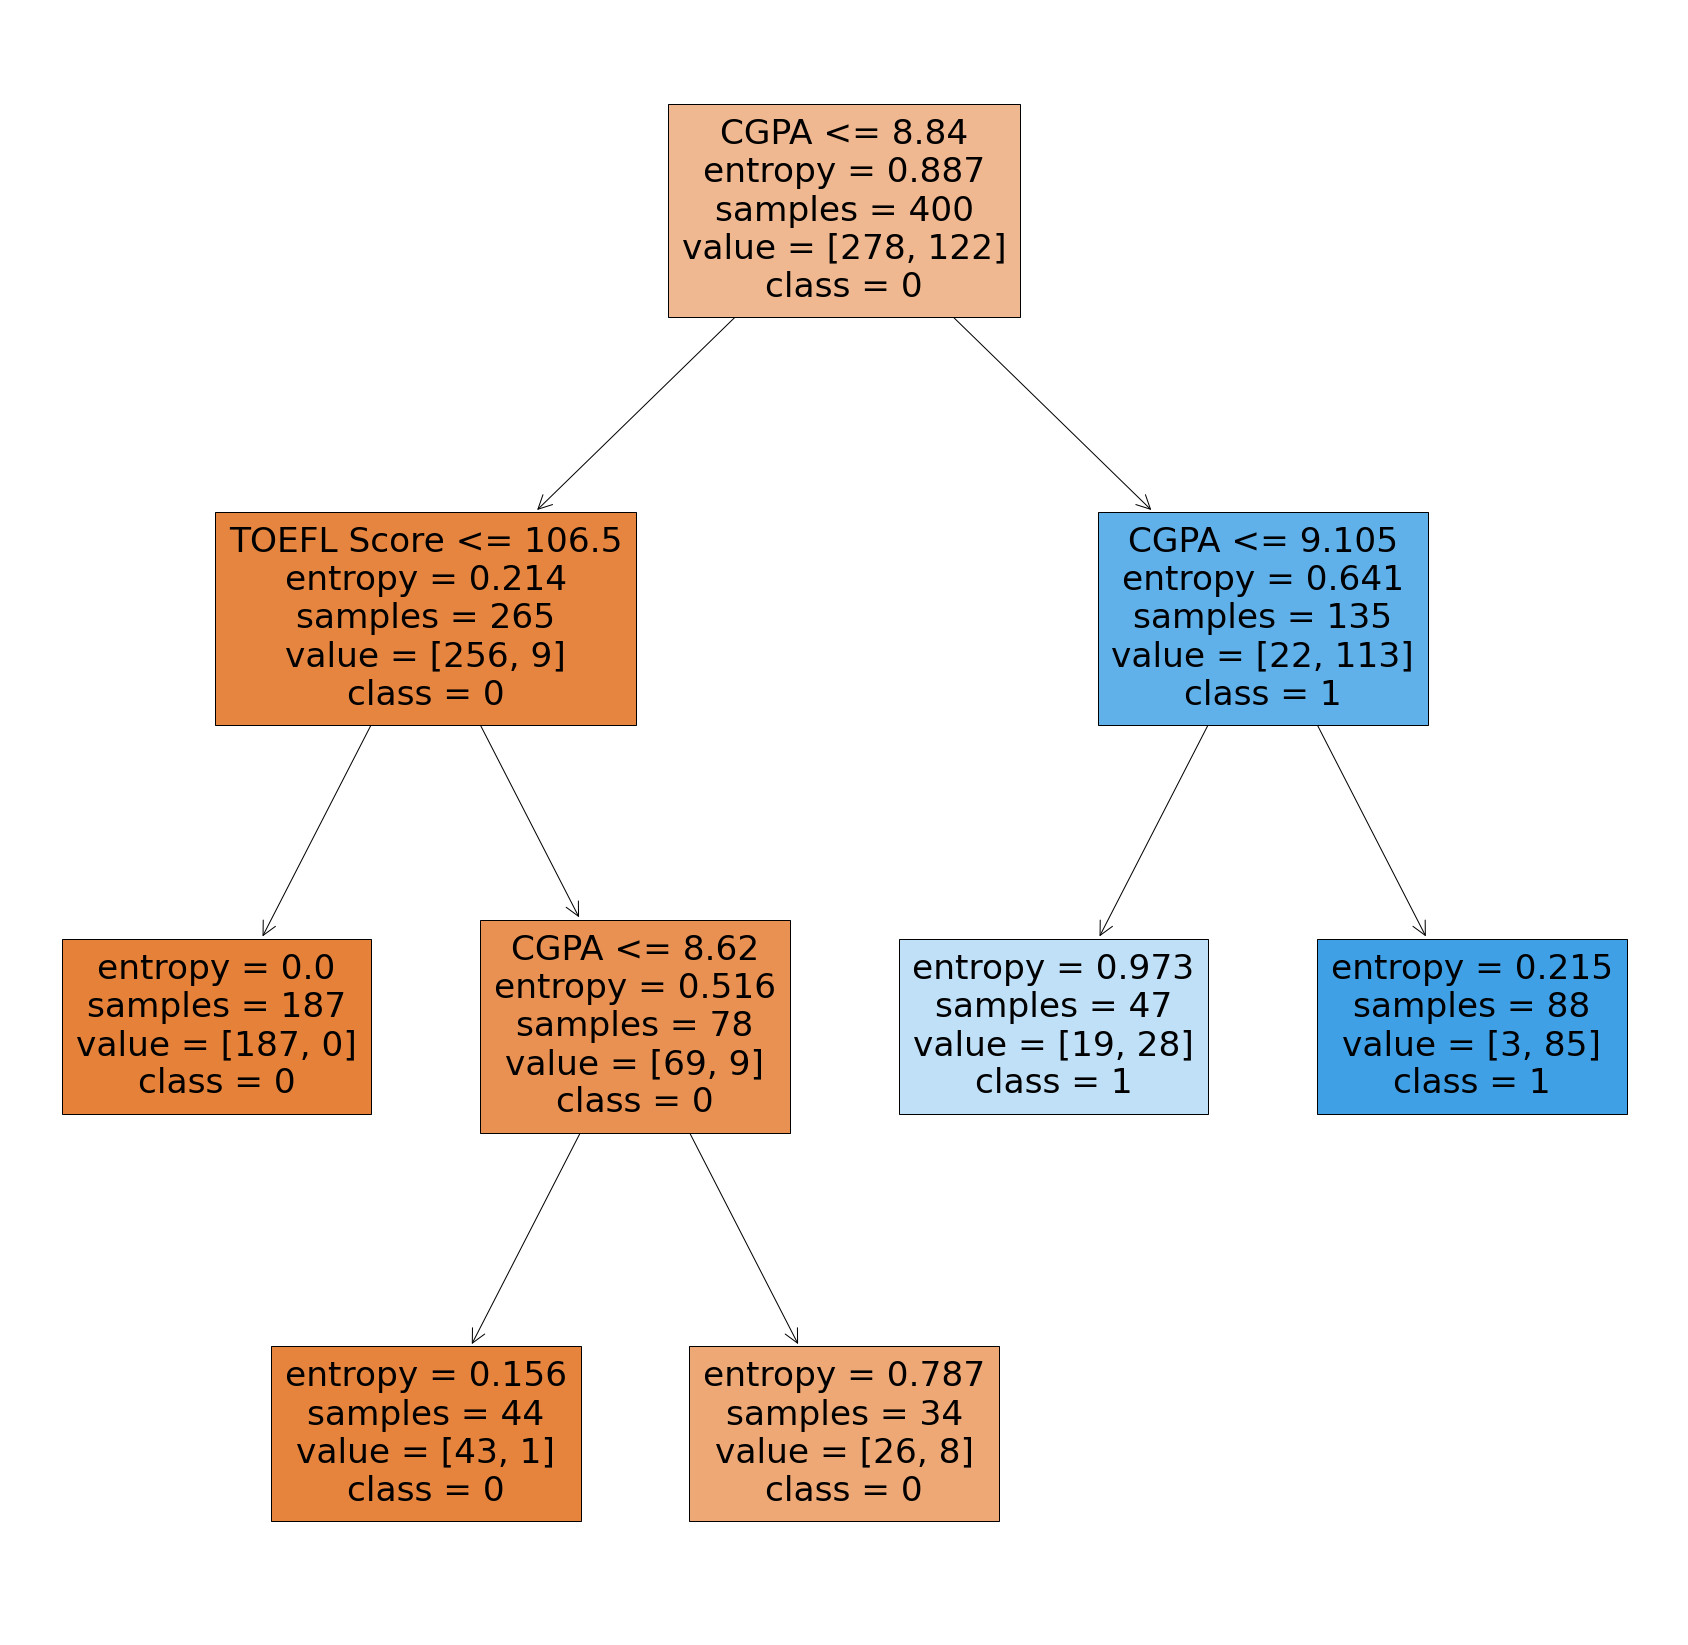

In [34]:
labels = X_train.columns
fig = plt.figure(figsize=(30,30))
_ = tree.plot_tree(df_grid_model,feature_names=labels,class_names=["0","1"],filled=True)

In [35]:
y_predict = df_grid_model.predict(X_test)

In [36]:
confusion_matrix(y_test,y_predict)

array([[63,  4],
       [ 4, 29]], dtype=int64)

In [37]:
 cohen_kappa_score(y_test,y_predict)

0.8190863862505653

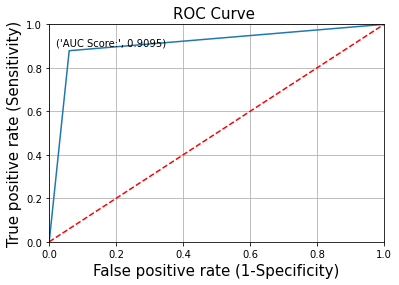

In [38]:
fpr , tpr, thresholds = roc_curve(y_test, y_predict)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC Curve ', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_predict),4)))

plt.grid(True)

In [39]:
from  sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score

print("precision_score : ",precision_score(y_test, y_predict))

print("recall_score    : ",recall_score(y_test, y_predict))

print("f1_score        : ",f1_score(y_test, y_predict))

print("accuracy_score  : ",accuracy_score(y_test, y_predict))

precision_score :  0.8787878787878788
recall_score    :  0.8787878787878788
f1_score        :  0.8787878787878788
accuracy_score  :  0.92


# Random Forest

In [40]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=10)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=10)

In [41]:
y_pred = rf_reg.predict(X_test)

In [42]:
rf_reg_MAE = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', rf_reg_MAE)


rf_reg_MSE = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', rf_reg_MSE)


rf_reg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', rf_reg_RMSE)

Mean Absolute Error (MAE): 0.1241
Mean Squared Error (MSE): 0.053903
Root Mean Squared Error (RMSE): 0.2321701961923623


# GridSearchCV

In [43]:
tuned_paramaters = [{'n_estimators': [ 85, 100],
                     'min_samples_split': [15,20],
                     'max_depth': [8, 10],
                     'min_samples_leaf': [5,10],
                     'max_leaf_nodes': [10, 15]
                    }]

In [44]:
rf_reg_CV= RandomForestRegressor(random_state = 10)
grid = GridSearchCV(estimator = rf_reg_CV, 
                         param_grid = tuned_paramaters, 
                         cv = 10)
dt_grid = grid.fit(X_train, y_train)
print('Best parameters for random forest regressor: ', dt_grid.best_params_, '\n')

Best parameters for random forest regressor:  {'max_depth': 8, 'max_leaf_nodes': 10, 'min_samples_leaf': 10, 'min_samples_split': 15, 'n_estimators': 85} 



In [45]:
dt_grid_model = RandomForestRegressor(n_estimators = dt_grid.best_params_.get('n_estimators'),
                                       max_depth = dt_grid.best_params_.get('max_depth'),
                                       max_leaf_nodes = dt_grid.best_params_.get('max_leaf_nodes'),
                                       min_samples_leaf = dt_grid.best_params_.get('min_samples_leaf'),
                                       min_samples_split = dt_grid.best_params_.get('min_samples_split'),
                                       random_state = 10)


dt_grid_model = dt_grid_model.fit(X_train, y_train)

In [46]:
y_pred = dt_grid_model.predict(X_test)

In [47]:

rf_reg_CV_MAE = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', rf_reg_CV_MAE)
                                         
rf_reg_CV_MSE = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', rf_reg_CV_MSE)
                                         
rf_reg_CV_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', rf_reg_CV_RMSE)

Mean Absolute Error (MAE): 0.12939666555913143
Mean Squared Error (MSE): 0.061937770969646075
Root Mean Squared Error (RMSE): 0.24887300168890572


# XGBM

In [48]:
from xgboost.sklearn import XGBClassifier


xgbm = XGBClassifier(random_state=1,learning_rate=0.01)

xgbm.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

In [49]:
y_pred_xgbm  = xgbm.predict(X_test)

In [50]:
confusion_matrix(y_test, y_pred_xgbm)

array([[63,  4],
       [ 6, 27]], dtype=int64)

In [52]:
result = classification_report(y_test,y_pred_xgbm)

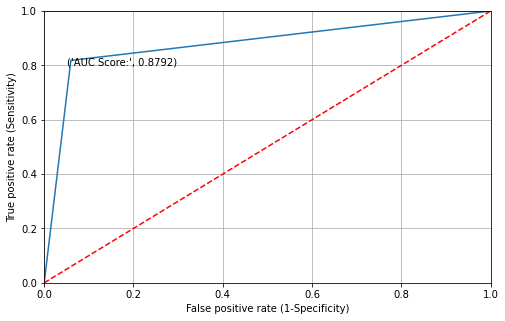

In [53]:
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgbm)

plt.plot(fpr,tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')

plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_xgbm),4)))

plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

plt.grid(True)

In [54]:
print(result)

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        67
           1       0.87      0.82      0.84        33

    accuracy                           0.90       100
   macro avg       0.89      0.88      0.89       100
weighted avg       0.90      0.90      0.90       100

